#Downloading Data

In [30]:
!pip install gdown

In [1]:
#https://drive.google.com/file/d/1IRABqIlMQmHZ5TlnVRCrOx6NlN1RHQNc/view?usp=sharing
# Raw Data link : https://drive.google.com/file/d/1cXRkL_LDG8TB2q6HiMjF5dgT112p7jUU/view?usp=sharing

!gdown https://drive.google.com/uc?id=1cXRkL_LDG8TB2q6HiMjF5dgT112p7jUU

Downloading...
From: https://drive.google.com/uc?id=1cXRkL_LDG8TB2q6HiMjF5dgT112p7jUU
To: /content/stocks.xlsx
100% 29.0k/29.0k [00:00<00:00, 25.7MB/s]


# Importing Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

plt.style.use('seaborn')
%matplotlib inline

# Loading Data

In [3]:
stocks = pd.read_excel('./stocks.xlsx')
stocks.head()

,BandhanBank,Burgerking,Glenmark,ITC,CIL,Canara Bank,Castrol,Exide Ind,CUB,Rsys,govt bond,nifty50_return
0,335.45,127.25,479.05,212.55,130.30,148.00,123.55,105.45,165.45,114.75,1000.000000,0.000000
1,350.90,131.10,483.25,220.05,129.80,146.75,125.35,106.05,155.50,114.35,1006.000000,-0.000629
2,338.90,128.55,464.70,218.50,132.15,156.35,124.80,106.30,156.30,114.05,1012.036000,0.014847
3,336.45,130.70,461.90,214.55,130.35,152.20,125.30,107.90,161.10,114.40,1018.108216,0.009584
4,345.60,129.90,450.55,210.90,132.95,147.05,124.80,106.55,155.95,113.65,1024.216865,0.005433


#1. Pick any 10 risky assets from the market. Use their 3 months closing price to obtain simple returns.

In [4]:
risk_free = stocks['govt bond']
ret_rf = ((risk_free-risk_free.shift(1))/risk_free.shift(1))
ret_rf = ret_rf.drop([0])
ret_rf.head(4)


1    0.006
2    0.006
3    0.006
4    0.006
Name: govt bond, dtype: float64

In [5]:
market_ret = stocks['nifty50_return']
market_ret = market_ret.drop([0])
market_ret.head(4)

1   -0.000629
2    0.014847
3    0.009584
4    0.005433
Name: nifty50_return, dtype: float64

In [6]:
stocks = stocks.drop(['govt bond','nifty50_return'],axis = 1)
ret = (stocks - stocks.shift(1))/stocks.shift(1)
ret = ret.drop([0])
ret.head(4)

,BandhanBank,Burgerking,Glenmark,ITC,CIL,Canara Bank,Castrol,Exide Ind,CUB,Rsys
1,0.046058,0.030255,0.008767,0.035286,-0.003837,-0.008446,0.014569,0.005690,-0.060139,-0.003486
2,-0.034198,-0.019451,-0.038386,-0.007044,0.018105,0.065417,-0.004388,0.002357,0.005145,-0.002624
3,-0.007229,0.016725,-0.006025,-0.018078,-0.013621,-0.026543,0.004006,0.015052,0.030710,0.003069
4,0.027196,-0.006121,-0.024572,-0.017012,0.019946,-0.033837,-0.003990,-0.012512,-0.031968,-0.006556


# 2. Use the mean-variance theory and build the Markowitz efficient frontier.

In [7]:
# Finding Covariance Matrix
cov_matrix = ret.cov()
print(cov_matrix)

             BandhanBank  Burgerking  ...       CUB          Rsys
BandhanBank     0.000711    0.000254  ... -0.000053 -2.588086e-05
Burgerking      0.000254    0.000517  ... -0.000082  4.142225e-05
Glenmark        0.000205    0.000087  ... -0.000057  4.944588e-07
ITC             0.000092    0.000090  ... -0.000049  4.195207e-05
CIL             0.000108   -0.000096  ... -0.000060 -7.901008e-05
Canara Bank    -0.000002   -0.000160  ...  0.000026 -6.400636e-05
Castrol        -0.000005   -0.000020  ... -0.000036  3.630646e-06
Exide Ind       0.000095   -0.000080  ...  0.000133 -2.115590e-05
CUB            -0.000053   -0.000082  ...  0.000467  5.205150e-05
Rsys           -0.000026    0.000041  ...  0.000052  3.299218e-04

[10 rows x 10 columns]


In [8]:
# Finding Inverse of Covariance Matrix
cov_inv_matrix= np.linalg.pinv(cov_matrix.values)
cov_inv_matrix

array([[ 2.46272326e+03, -1.15973511e+03, -1.40881057e+03,
        -2.94385903e+01, -6.57135600e+02,  1.72537958e+02,
         3.49071814e+02, -8.92431694e+02,  7.14738475e+01,
         1.48408348e+02],
       [-1.15973511e+03,  2.82360441e+03,  1.92429756e+02,
        -3.76802496e+02,  5.60985063e+02,  1.33847783e+02,
        -1.22359941e+02,  5.31497481e+02,  2.79014379e+02,
        -2.46138531e+02],
       [-1.40881057e+03,  1.92429756e+02,  4.54498464e+03,
        -6.89842521e+02,  2.42200732e+00, -2.71491770e+01,
        -1.08727973e+02,  9.25582228e+02,  8.96524027e+01,
        -1.20504442e+01],
       [-2.94385903e+01, -3.76802496e+02, -6.89842521e+02,
         3.02018487e+03, -8.51454236e+01, -5.06306606e+01,
        -4.44110957e+01, -9.32245291e+01,  2.24595612e+02,
        -4.09143554e+02],
       [-6.57135600e+02,  5.60985063e+02,  2.42200732e+00,
        -8.51454236e+01,  3.70713142e+03, -1.21925031e+03,
        -1.59255133e+03, -4.14302358e+02,  4.99785945e+02,
         4.

In [9]:
cov_matrix.shape

(10, 10)

In [10]:
# creacting U vector of all ones
u_vector = np.array([1 for i in range(cov_matrix.shape[0])])
u_vector

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Finding w vector 

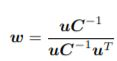




In [11]:
# Finding W vector

w_matrix = u_vector.dot(cov_inv_matrix)
w_matrix = w_matrix/w_matrix.dot(np.transpose(u_vector))
w_matrix

array([-0.05003171,  0.1387629 ,  0.18607971,  0.07775971,  0.06651562,
        0.02643724,  0.15871481,  0.12881209,  0.13076603,  0.13618359])

In [12]:
np.sum(w_matrix)

1.0

Finding Varience/ Risk

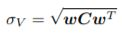

In [13]:
# Finding optimal varience/risk
varience_min = w_matrix.dot(cov_matrix)
varience_min = varience_min.dot(np.transpose(w_matrix))
varience_min

5.303697408308228e-05

Finding optimal mean/return

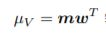

In [14]:
# Finding optimal mean/return
m_matrix = ret.mean(axis=0).values
min_ret = m_matrix.dot(np.transpose(w_matrix))
min_ret

0.0013203036839637206

In [15]:
m_matrix

array([ 0.003162  ,  0.00498839,  0.00154946, -0.00039551,  0.00105345,
       -0.00131309,  0.00075047, -0.00067071,  0.00209815,  0.00136797])

In [16]:
#Randomly Finding Points each point representing portfolio

np.random.seed(40)

num_asset = len(stocks.columns)
num_points = 15000

portfolio_var = []
portfolio_ret = []

for i in tqdm(range(num_points)):

  weights = np.array(np.random.random(num_asset))
  weights = weights/np.sum(weights)

  varience = weights.dot(cov_matrix)
  varience = varience.dot(np.transpose(weights))
  portfolio_var.append(varience)

  p_return = m_matrix.dot(np.transpose(weights))
  portfolio_ret.append(p_return)




100%|██████████| 15000/15000 [00:00<00:00, 20369.39it/s]


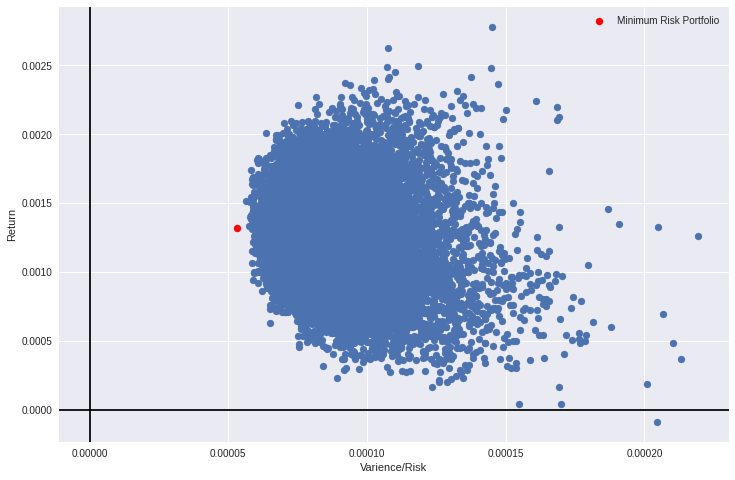

In [17]:
#Ploting Markowitz efficient frontier

plt.figure(figsize=(12,8))
plt.scatter(portfolio_var, portfolio_ret)

plt.xlabel('Varience/Risk')
plt.ylabel('Return')
plt.scatter(varience_min, min_ret,c='red', s=50,label= 'Minimum Risk Portfolio')

plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.legend()


plt.show()

#3. Use a risk-free asset along with the 10 risky assets to obtain CAP"M". Draw the straight line and show that it is tangent to the efficient frontier. Obtain the market portfolio.

Calculating w_cap


In [18]:
m_rf = ret_rf.mean()


w_cap = (m_matrix- m_rf*u_vector).dot(cov_inv_matrix)

w_cap = w_cap/w_cap.dot(np.transpose(u_vector))

print(w_cap)
print(w_cap.sum())

[-0.06556812  0.05232741  0.20086411  0.14864281  0.00578739  0.05670956
  0.18728287  0.19790839  0.07696759  0.13907799]
1.0


In [19]:
# Calculating risk of derived portfolio
varience_der = w_cap.dot(cov_matrix)
varience_der = varience_der.dot(np.transpose(w_cap))
varience_der

6.123073918999016e-05

In [20]:
# Calculating Return of derived portfolio
ret_der = m_matrix.dot(np.transpose(w_cap))
ret_der

0.0005973300774135407

In [21]:
x = [0,varience_der]
y = [m_rf,ret_der] 

print(x,y)

[0, 6.123073918999016e-05] [0.0060000000058692245, 0.0005973300774135407]


In [22]:
varience_min, min_ret

(5.303697408308228e-05, 0.0013203036839637206)

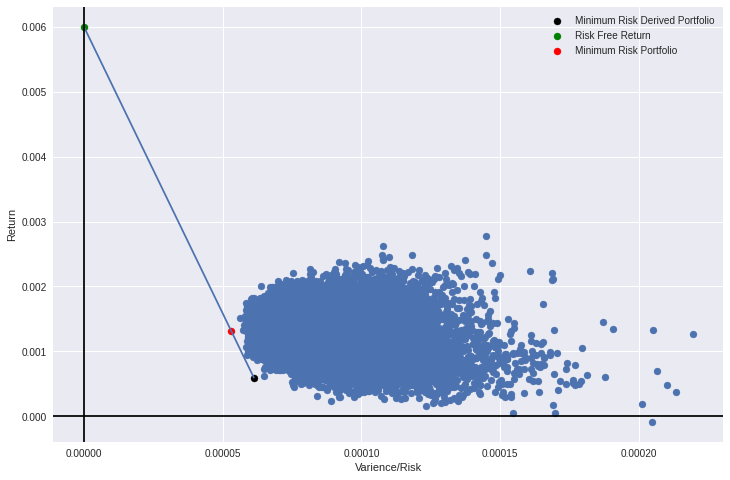

In [23]:
plt.figure(figsize=(12,8))
plt.scatter(portfolio_var, portfolio_ret)

plt.xlabel('Varience/Risk')
plt.ylabel('Return')
plt.plot(x,y)

plt.scatter(varience_der,ret_der,c='black', s=50,label= 'Minimum Risk Derived Portfolio')
plt.scatter(0,m_rf,c='green', s=50,label= 'Risk Free Return')
plt.scatter(varience_min, min_ret,c='red', s=50,label= 'Minimum Risk Portfolio')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.legend()
plt.show()

# 4. Use any three assets out of the 10 risky assets to get three different SMLs.

## SML1 : stocks{ Bandhan Bank, Burger King, Glenmark }

In [24]:
# SML1
m_rf = 0.0001

ret1 = ret[['BandhanBank','Burgerking','Glenmark']]

df = pd.DataFrame({'BandhanBank' : ret1['BandhanBank'].values , 'market' :market_ret} )
covariance = df.cov()
beta1= covariance['BandhanBank']['market']/covariance['market']['market']


df = pd.DataFrame({'Burgerking' : ret1['Burgerking'].values , 'market' :market_ret} )
covariance = df.cov()
beta2= covariance['Burgerking']['market']/covariance['market']['market']

df = pd.DataFrame({'Glenmark' : ret1['Glenmark'].values , 'market' :market_ret} )
covariance = df.cov()
beta3= covariance['Glenmark']['market']/covariance['market']['market']

u_k1 =  (m_rf + beta1*(np.mean(market_ret) - m_rf))
u_k2 =  (m_rf + beta2*(np.mean(market_ret) - m_rf))
u_k3 =  (m_rf + beta3*(np.mean(market_ret) - m_rf))

x= [beta1,beta2,beta3,0]
y = [u_k1 , u_k2,u_k3,m_rf]

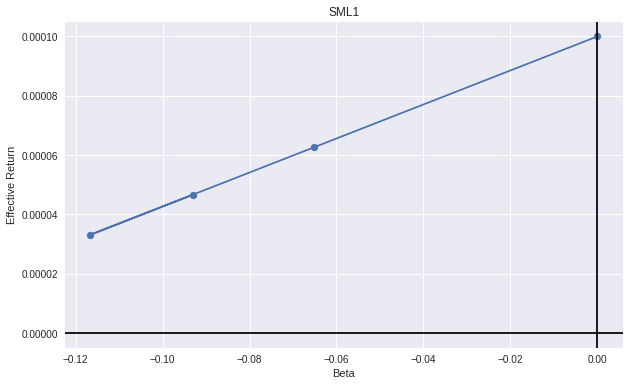

In [25]:
plt.figure(figsize=(10,6))
plt.title('SML1')
plt.xlabel('Beta')
plt.ylabel('Effective Return')
plt.plot(x,y)
plt.scatter(x,y)
plt.axis()
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.show()


## SML2 : stocks{ 'ITC' ,	'CIL'	, 'Canara Bank' }

In [26]:
# SML2
m_rf = 0.0001

ret1 = ret[['ITC' ,	'CIL'	, 'Canara Bank']]

df = pd.DataFrame({'ITC' : ret1['ITC'].values , 'market' :market_ret} )
covariance = df.cov()
beta1= covariance['ITC']['market']/covariance['market']['market']


df = pd.DataFrame({'CIL' : ret1['CIL'].values , 'market' :market_ret} )
covariance = df.cov()
beta2= covariance['CIL']['market']/covariance['market']['market']

df = pd.DataFrame({'Canara Bank' : ret1['Canara Bank'].values , 'market' :market_ret} )
covariance = df.cov()
beta3= covariance['Canara Bank']['market']/covariance['market']['market']

u_k1 =  (m_rf + beta1*(np.mean(market_ret) - m_rf))
u_k2 =  (m_rf + beta2*(np.mean(market_ret) - m_rf))
u_k3 =  (m_rf + beta3*(np.mean(market_ret) - m_rf))

x= [beta1,beta2,beta3,0]
y = [u_k1 , u_k2,u_k3,m_rf]

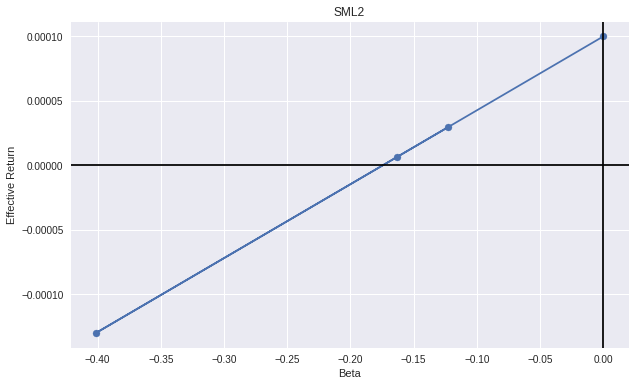

In [27]:
plt.figure(figsize=(10,6))
plt.title('SML2')
plt.xlabel('Beta')
plt.ylabel('Effective Return')
plt.plot(x,y)
plt.scatter(x,y)
plt.axis()
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.show()


## SML3 : stocks{ 'Castrol','Exide Ind',	'CUB' }

In [28]:
# SML3
m_rf = 0.0001

ret1 = ret[['Castrol','Exide Ind',	'CUB']]

df = pd.DataFrame({'Castrol' : ret1['Castrol'].values , 'market' :market_ret} )
covariance = df.cov()
beta1= covariance['Castrol']['market']/covariance['market']['market']


df = pd.DataFrame({'Exide Ind' : ret1['Exide Ind'].values , 'market' :market_ret} )
covariance = df.cov()
beta2= covariance['Exide Ind']['market']/covariance['market']['market']

df = pd.DataFrame({'CUB' : ret1['CUB'].values , 'market' :market_ret} )
covariance = df.cov()
beta3= covariance['CUB']['market']/covariance['market']['market']

u_k1 =  (m_rf + beta1*(np.mean(market_ret) - m_rf))
u_k2 =  (m_rf + beta2*(np.mean(market_ret) - m_rf))
u_k3 =  (m_rf + beta3*(np.mean(market_ret) - m_rf))

x= [beta1,beta2,beta3,0]
y = [u_k1 , u_k2,u_k3,m_rf]

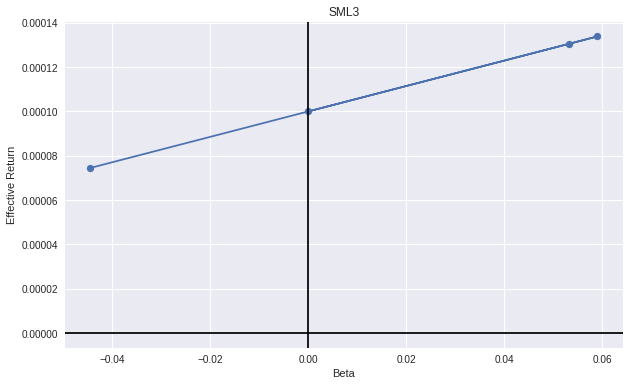

In [29]:
plt.figure(figsize=(10,6))
plt.title('SML3')
plt.xlabel('Beta')
plt.ylabel('Effective Return')
plt.plot(x,y)
plt.scatter(x,y)
plt.axis()
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.show()
